## Agenda
        1 - Feature Engineering
            X_preço_po_m2
            X_bairro = 'Outra'
        2 - Finalizando preparação
        3 - Criando modelo 
            Linear Regression
        Visualizando Resultados (repensando plano de ação)

In [54]:
import pandas as pd

# Separa dados de treino e teste
from sklearn.model_selection import train_test_split

# Modelo/Algoritmo
from sklearn.linear_model import LinearRegression

# Validação cruzada
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [5]:
data = pd.read_csv("Dados para modelar.csv", index_col=0)
data.head()

,Localização,X_bairro,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço
0,"Rua General Polidoro, Várzea",Várzea,69,2,1,1,262900
2,"Avenida Santos Dumont, Aflitos",Aflitos,54,2,1,2,450000
3,"Rua Alameda das Hortências, Imbiribeira",Imbiribeira,204,4,3,5,2500000
4,"Rua Cônego Romeu, Boa Viagem",Boa Viagem,70,2,1,2,499000
5,"Rua Professor Augusto Lins e Silva, Boa Viagem",Boa Viagem,74,3,1,3,350000


## Feature Engineering
No mercado imobiliário, o preço por m² é uma variável muito importante a se considerar, por isso, vamos criá-la para que ela entre na computação dos algoritmos.

In [6]:
data['X_preço_po_m2'] = data.y_preço / data.X_tamanho_em_m2
data.head()

,Localização,X_bairro,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço,X_preço_po_m2
0,"Rua General Polidoro, Várzea",Várzea,69,2,1,1,262900,3810.144928
2,"Avenida Santos Dumont, Aflitos",Aflitos,54,2,1,2,450000,8333.333333
3,"Rua Alameda das Hortências, Imbiribeira",Imbiribeira,204,4,3,5,2500000,12254.901961
4,"Rua Cônego Romeu, Boa Viagem",Boa Viagem,70,2,1,2,499000,7128.571429
5,"Rua Professor Augusto Lins e Silva, Boa Viagem",Boa Viagem,74,3,1,3,350000,4729.729730


### X_bairro = 'Outra'
Outra alteração a se fazer é a criação de um "outro" bairro referente àqueles que tem pouquissímos imóveis. E mais a frente excluir tais dados.

In [25]:
data.groupby("X_bairro").count().sort_values("X_tamanho_em_m2").head()

,Localização,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço,X_preço_po_m2
X_bairro,,,,,,,
Zumbi,1,1,1,1,1,1,1
Porto da Madeira,1,1,1,1,1,1,1
Fundão,1,1,1,1,1,1,1
Coqueiral,1,1,1,1,1,1,1
Linha do Tiro,1,1,1,1,1,1,1


In [26]:
# Uma outra maneira de fazer o que fizemos acima
location_count = data.groupby("X_bairro").X_bairro.agg("count").sort_values()

data.groupby("X_bairro").X_bairro.agg("count").sort_values().head()

X_bairro
Zumbi               1
Porto da Madeira    1
Fundão              1
Coqueiral           1
Linha do Tiro       1
Name: X_bairro, dtype: int64

In [29]:
len(location_count[location_count<10])

24

In [30]:
location_count_less_than_10 = location_count[location_count<10]

data.X_bairro = data.X_bairro.apply(lambda x: 'Outra' if x in location_count_less_than_10 else x)

data.X_bairro.unique()

array(['Várzea', 'Aflitos', 'Imbiribeira', 'Boa Viagem', 'Encruzilhada',
       'Graças', 'Iputinga', 'Tamarineira', 'Espinheiro',
       'Ilha do Retiro', 'Santo Amaro', 'Jardim São Paulo', 'Madalena',
       'Derby', 'Outra', 'Prado', 'Boa Vista', 'Casa Amarela', 'Torre',
       'Rosarinho', 'Cordeiro', 'Casa Forte', 'Arruda', 'Campo Grande',
       'Torreão', 'Santana', 'Pina', 'Poço', 'San Martin', 'Caxangá',
       'Parnamirim', 'Hipódromo', 'Jaqueira', 'Dois Irmãos', 'Paissandu',
       'Apipucos', 'Engenho do Meio', 'Barro', 'Santo Antônio',
       'Agua Fria', 'Ilha do Leite', 'Monteiro', 'Ponto de Parada',
       'Ibura'], dtype=object)

In [32]:
data[data.X_bairro == 'Outra'].head()

,Localização,X_bairro,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço,X_preço_po_m2
34,"Rua Pedro Américo, Bongi",Outra,103,4,2,3,680000,6601.941748
39,"Rua Itapemirim, Bongi",Outra,87,3,2,3,450000,5172.413793
51,"Rua Capitão Benedito Bragança, Guabiraba",Outra,110,4,2,3,280000,2545.454545
56,"Rua Alexandre Padilha, Bongi",Outra,103,4,2,3,680000,6601.941748
156,"Rua Hercília de Medeiros, Cajueiro",Outra,70,2,1,2,499000,7128.571429


## 2 - Finalizando preparação
Agora só é preciso manter as colunas que o modelo utilizará ['Localização'] será desnecessária (mantive apenas para as análises anteriores) e transformar os valores de ['X_bairro'] em números ([one-hot encoding](https://minerandodados.com.br/one-hot-encoding-como-funciona-python/)).

In [38]:
df = data[["X_bairro", "X_tamanho_em_m2", "X_número_de_quartos", "X_vagas_para_estacionar",
      "X_número_de_banheiros", "X_preço_po_m2", "y_preço"]]

df.head(2)

,X_bairro,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,X_preço_po_m2,y_preço
0,Várzea,69,2,1,1,3810.144928,262900
2,Aflitos,54,2,1,2,8333.333333,450000


In [41]:
dummies = pd.get_dummies(df.X_bairro)
dummies.head()

,Aflitos,Agua Fria,Apipucos,Arruda,Barro,Boa Viagem,Boa Vista,Campo Grande,Casa Amarela,Casa Forte,...,Prado,Rosarinho,San Martin,Santana,Santo Amaro,Santo Antônio,Tamarineira,Torre,Torreão,Várzea
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
data_frame = pd.concat([df,dummies.drop(columns="Outra")], axis="columns")

data_frame.drop(columns="X_bairro",inplace=True)

data_frame.head()

,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,X_preço_po_m2,y_preço,Aflitos,Agua Fria,Apipucos,Arruda,...,Prado,Rosarinho,San Martin,Santana,Santo Amaro,Santo Antônio,Tamarineira,Torre,Torreão,Várzea
0,69,2,1,1,3810.144928,262900,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,54,2,1,2,8333.333333,450000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,204,4,3,5,12254.901961,2500000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,70,2,1,2,7128.571429,499000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,74,3,1,3,4729.729730,350000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3 - Criando modelo
Agora podemos começar a criar o modelo de predição de preço de imóveis. Passo 1: Separar features e labels. E dados de treino e teste.

In [44]:
X = data_frame.drop(columns="y_preço")
X.head(3)

,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,X_preço_po_m2,Aflitos,Agua Fria,Apipucos,Arruda,Barro,...,Prado,Rosarinho,San Martin,Santana,Santo Amaro,Santo Antônio,Tamarineira,Torre,Torreão,Várzea
0,69,2,1,1,3810.144928,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,54,2,1,2,8333.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,204,4,3,5,12254.901961,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
y = data_frame.y_preço
y.head(3)

0     262900
2     450000
3    2500000
Name: y_preço, dtype: int64

In [98]:
# Separando dados para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [99]:
# Criando instância do Modelo
linear_model  = LinearRegression()

# Treinando o modelo
linear_model.fit(X_train,y_train)

# Testando a performance do modelo com dados que ele não viu
linear_model.score(X_test,y_test)

0.9559075229939121

95% de acerto nas predições, parece um resultado muito bom, **mas na verdade, se pararmos para refletir sobre os dados, os preços e os dados em si não variam muito (em outras palavras, tenho a impressão de que não representam a realidade com precisão)**, então talvez esse seja um motivo para ele ter ido tão bem.

[Validação Cruzada](https://minerandodados.com.br/validacao-cruzada-aprenda-de-forma-simples-como-usar-essa-tecnica/):

In [102]:
cross_validation = ShuffleSplit(n_splits=5, test_size=0.2)

cross_val_score(LinearRegression(), X, y, cv=cross_validation)

array([0.95588953, 0.95239382, 0.95828304, 0.95635923, 0.95153255])

## Visualizando Resultados (repensando plano de ação)

In [232]:
original_values = []
predictions = []

In [233]:
# Rodei várias vezes para adicionar mais e diferentes resultados às listas
for test in range(10):
    hehe = X.sample()
    prediction = linear_model.predict(hehe)
    y_value = data_frame.loc[hehe.index[0]].y_preço

    print("Preço Real -->", int(y_value))
    print("Predição ---->", int(prediction))
    print("\nDiferença --->", int(y_value - prediction))
    print("-"*22)
    
    original_values.append(y_value)
    predictions.append(prediction)

Preço Real --> 450000
Predição ----> 705222

Diferença ---> -255222
----------------------
Preço Real --> 499000
Predição ----> 594689

Diferença ---> -95689
----------------------
Preço Real --> 280000
Predição ----> 201180

Diferença ---> 78819
----------------------
Preço Real --> 750000
Predição ----> 848844

Diferença ---> -98844
----------------------
Preço Real --> 317500
Predição ----> 296183

Diferença ---> 21316
----------------------
Preço Real --> 317500
Predição ----> 289244

Diferença ---> 28255
----------------------
Preço Real --> 317500
Predição ----> 215905

Diferença ---> 101594
----------------------
Preço Real --> 530000
Predição ----> 536858

Diferença ---> -6858
----------------------
Preço Real --> 280000
Predição ----> 194707

Diferença ---> 85292
----------------------
Preço Real --> 450000
Predição ----> 603919

Diferença ---> -153919
----------------------


**A diferença nos valores parece ser pequena, mas lembrando que o preço está em milhão, cada centimetro é muito dinheiro kkkk.**

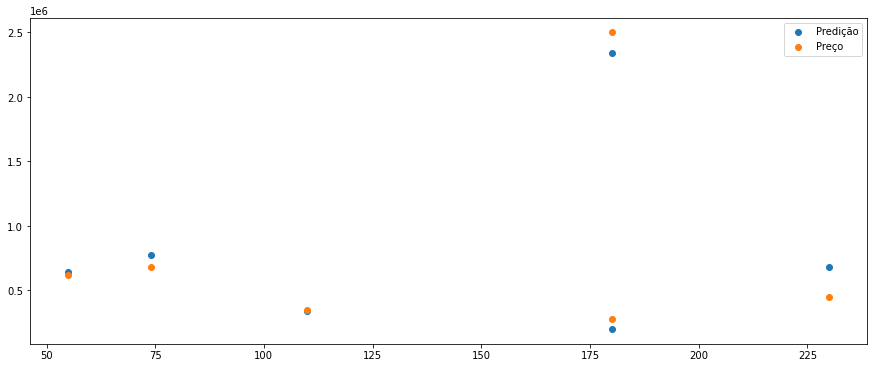

In [265]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

plt.scatter(X_test.X_tamanho_em_m2.tail(6),model_predictions[:6], label="Predição")
plt.scatter(X_test.X_tamanho_em_m2.tail(6),y_test[:6], label="Preço")
plt.legend()
plt.show()

**As predições seguem as variações dos valores, mas não tão precisamente quanto gostaria.**

Obviamente ao dar o "zoom" no gráfico, diminuindo o número de observações, a discrepância se mostra existente.

    Pensando como um "usuário" desses resultados. Receber a notícia de que a diferença entre o
    valor esperado e o valor real ser de 85292 ou 101594 mil reais não me agradaria muito.

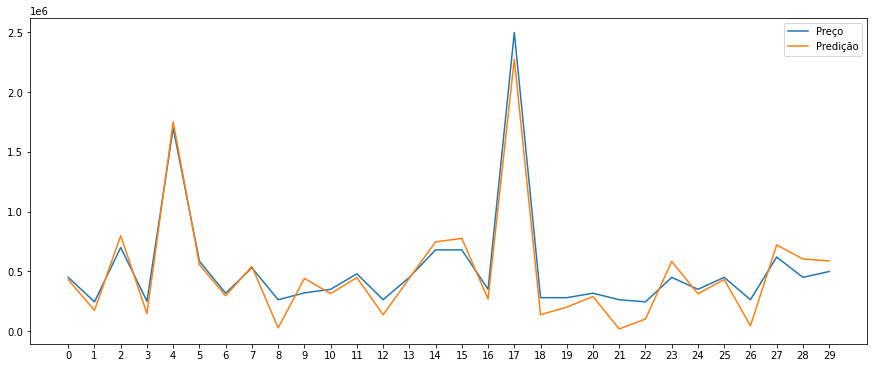

In [191]:
plt.figure(figsize=(15,6))
plt.plot(original_values, label="Preço")
plt.plot(predictions, label="Predição")
plt.xticks(range(len(original_values)))
plt.legend()

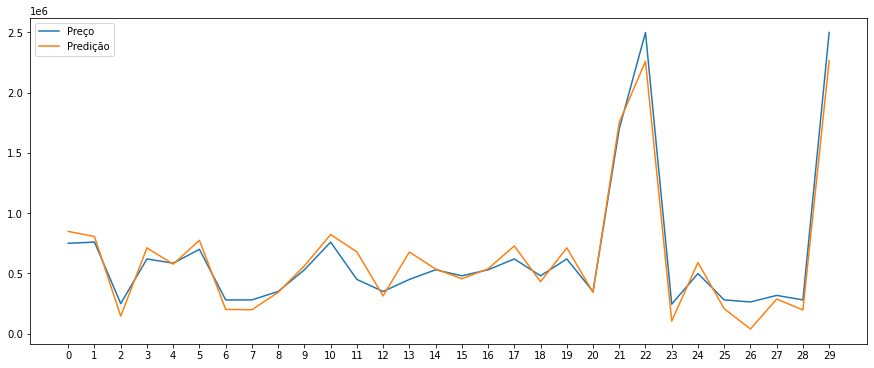

In [198]:
plt.figure(figsize=(15,6))
plt.plot(original_values, label="Preço")
plt.plot(predictions, label="Predição")
plt.xticks(range(len(original_values)))
plt.legend()

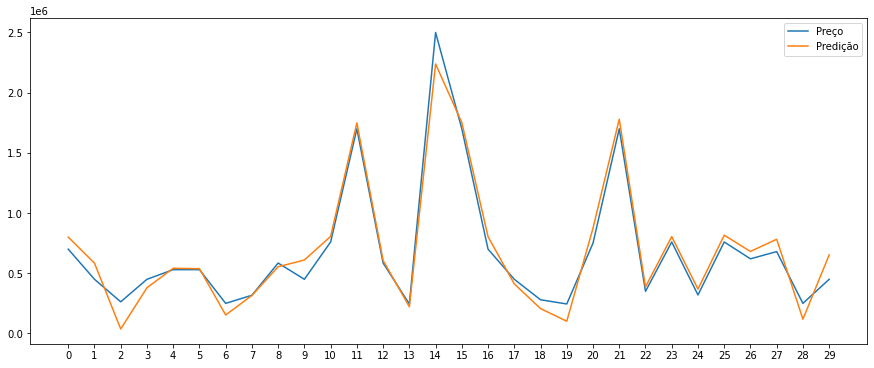

In [212]:
plt.figure(figsize=(15,6))
plt.plot(original_values, label="Preço")
plt.plot(predictions, label="Predição")
plt.xticks(range(len(original_values)))
plt.legend()

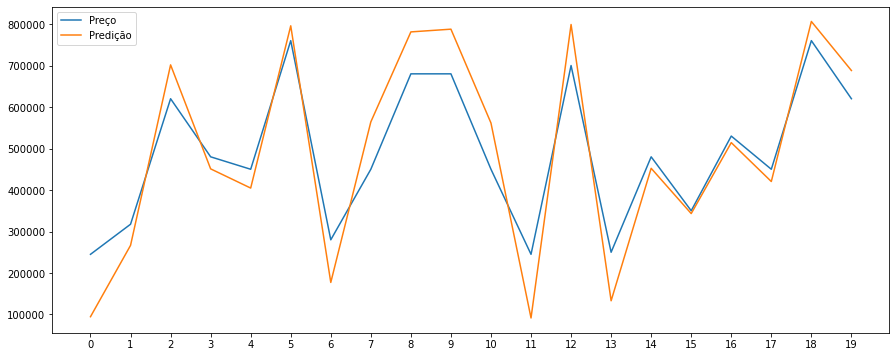

In [216]:
plt.figure(figsize=(15,6))
plt.plot(original_values, label="Preço")
plt.plot(predictions, label="Predição")
plt.xticks(range(len(original_values)))
plt.legend()

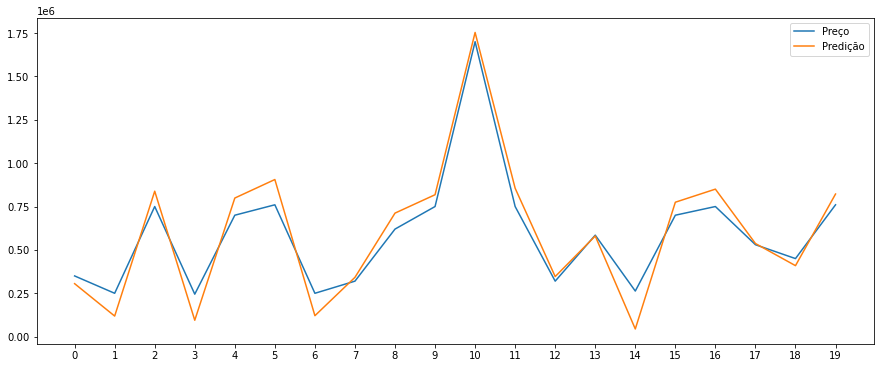

In [220]:
plt.figure(figsize=(15,6))
plt.plot(original_values, label="Preço")
plt.plot(predictions, label="Predição")
plt.xticks(range(len(original_values)))
plt.legend()

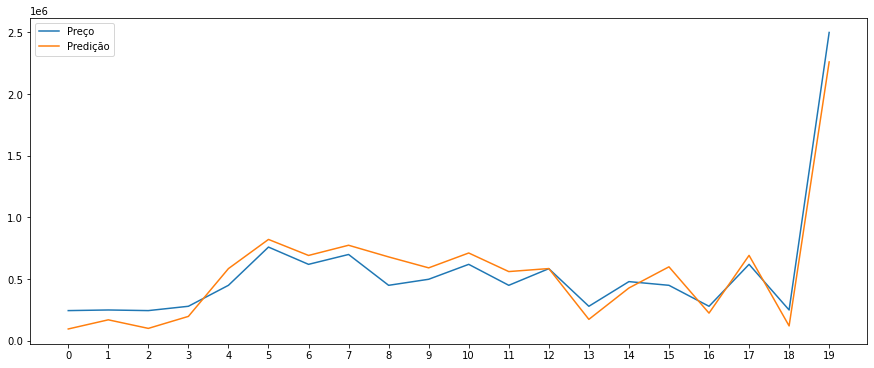

In [225]:
plt.figure(figsize=(15,6))
plt.plot(original_values, label="Preço")
plt.plot(predictions, label="Predição")
plt.xticks(range(len(original_values)))
plt.legend()

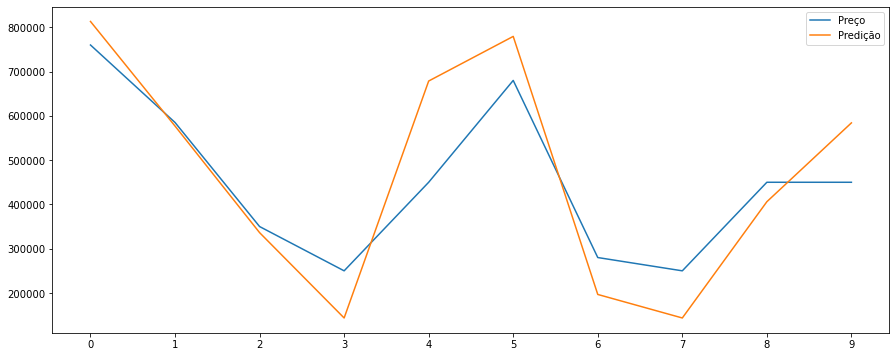

In [228]:
plt.figure(figsize=(15,6))
plt.plot(original_values, label="Preço")
plt.plot(predictions, label="Predição")
plt.xticks(range(len(original_values)))
plt.legend()

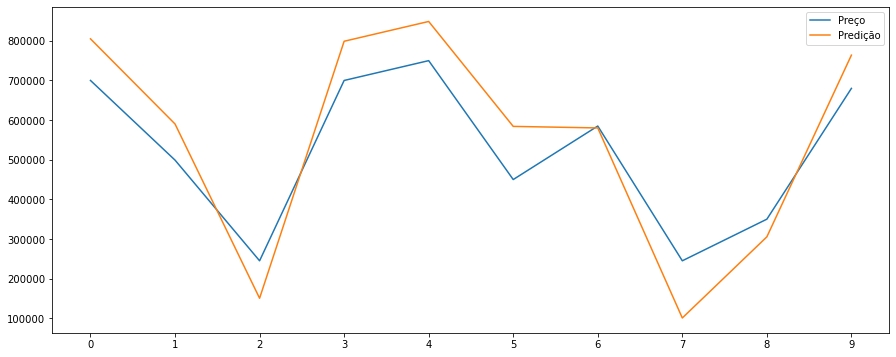

In [231]:
plt.figure(figsize=(15,6))
plt.plot(original_values, label="Preço")
plt.plot(predictions, label="Predição")
plt.xticks(range(len(original_values)))
plt.legend()

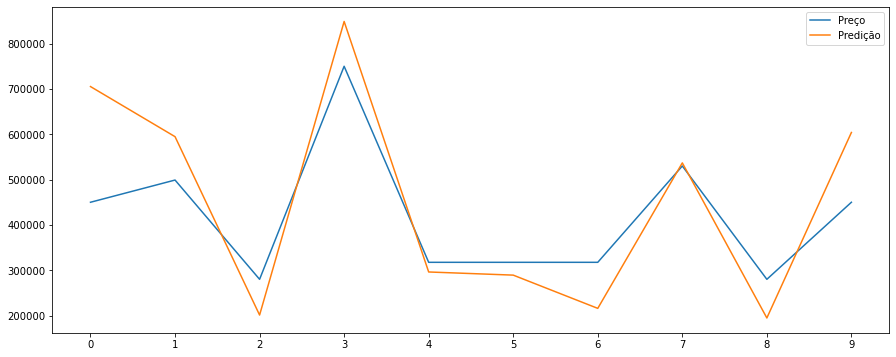

In [234]:
plt.figure(figsize=(15,6))
plt.plot(original_values, label="Preço")
plt.plot(predictions, label="Predição")
plt.xticks(range(len(original_values)))
plt.legend()

Por fim, não gostei do resultado. Começarei de novo, tomando mais cuidado para não cair nas armadilhas que caí mas não sei exatamente quais são kkkkk. Em outras palavras, **farei um planejamento melhor e buscarei ser mais eficiente nesse novo caminho. Utilizando mais tento para pensar em como fazer, ao invés de simplesmente ir fazendo. Se bem que como projeto de prática, meu objetivo era chegar ao final, mesmo que alcançando um resultado ruim. Para sentir o processo, ter a experiência e redundantemente ver com meus próprios olhos**. Ganhei muitos aprendizados que com certeza me ajudarão futuramente. Estou Feliz!